# Project 1: SAT & ACT Analysis (2017-2018)



## Problem Statement

The SAT's and ACT's are two popular college entrance tests in the United States, and the participation rates for both tests are some of the top concerns that educational boards often grapple with. In this project, we aim to study the 2017 and 2018 data on both tests to have a better understanding of what most affects their participation rates. Based on our analysis and research we will then provide subtantiated recommendations on what educational policies can best improve participation rates in the entrance tests.

## Executive Summary

**Data Import and Cleaning**

The first step in any Data Analysis is to first import and clean the data. We ensure that all the data is complete, accurate, and in the correct format before moving on to the analysis portion.

**Exploratory Data Analysis**

With a cleaned and properly prepared dataset, we carry out our initial data analysis. We look at the spread and distribution of the data, the average values, as well as the range of our data measurements.

**Visualise the Data**

Visualising the data helps us to understand them better. Distributions are much easier to see in graphs, and correlations can be better explored as well. Comparisons between related data measurements (for example, participation in the ACT compared to the SAT in any given year) can also be more clearly made through data visualisation.

**Descriptive and Inferential Statistics**

We take a deeper look into the data distribution. Statistical concepts like Central Limit Theorem and Hypothesis Testing are considered as we try to infer patterns from our data analysis.

**Outside Research**

Other than the data we have, there are also other factors which may not have been captured in the dataset. One example is the policy of having a nationwide "SAT School Day" - where students are allowed to take their SAT's during curriculum hours, at the school that they usually attend.

**Conclusions & Recommendations**

Our analysis shows that the simplest, most effective way to improve participation rates is through state funding of exam fees for **all** students. The second recommendation is to facilitate the test-taking for the students **during school hours** and **within the same school that the student normally goes to**. These are significant financial and logistical barriers that, when removed, will allow significantly more students to take the tests.


### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [55]:
#importing all required software libraries for the project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from scipy import stats

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [56]:
sat_2017 = pd.read_csv("sat_2017.csv")
act_2017 = pd.read_csv("act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [57]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [58]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [59]:
sat_2017.describe()   #shape and distribution, rows, columns

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [60]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


Answer:  

Both datasets consists of 51 rows, corresponding to the 51 states in the USA.
However, there are more subjects in the ACT test compared to the SAT test.

#### 4a. Does the data look complete? 

In [61]:
act_2017.isnull().value_counts()

State  Participation  English  Math   Reading  Science  Composite
False  False          False    False  False    False    False        52
dtype: int64

In [62]:
sat_2017.isnull().value_counts()

State  Participation  Evidence-Based Reading and Writing  Math   Total
False  False          False                               False  False    51
dtype: int64

Answer: **Yes**, based on the value counts of null and not-null values in the dataframe.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [63]:
act_2017[['English', 'Math', 'Reading', 'Science']].min()

English    16.3
Math       18.0
Reading    18.1
Science     2.3
dtype: float64

In [64]:
act_2017[['English', 'Math', 'Reading', 'Science']].max()

English    25.5
Math       25.3
Reading    26.0
Science    24.9
dtype: float64

In [65]:
sat_2017[['Evidence-Based Reading and Writing', 'Math']].min()

Evidence-Based Reading and Writing    482
Math                                   52
dtype: int64

In [66]:
sat_2017[['Evidence-Based Reading and Writing', 'Math']].max()

Evidence-Based Reading and Writing    644
Math                                  651
dtype: int64

Answer: There is an obvious issue with the minimum score for Math in SAT2017, as well as minimum score for Science in ACT2017.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [67]:
act_2017.loc[act_2017['Science'] == 2.3, :]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [68]:
sat_2017.loc[sat_2017['Math']==52, :]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [69]:
sat_2017.iloc[20, 3] = 524

In [70]:
sat_2017.iloc[20, :]

State                                 Maryland
Participation                              69%
Evidence-Based Reading and Writing         536
Math                                       524
Total                                     1060
Name: 20, dtype: object

In [71]:
act_2017.iloc[21, 5] = 23.2
act_2017.iloc[21, :]

State            Maryland
Participation         28%
English              23.3
Math                 23.1
Reading              24.2
Science              23.2
Composite            23.6
Name: 21, dtype: object

#### 5. What are your data types? 
Display the data types of each feature. 

In [72]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [73]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**Answer**:

The Participation data for both SAT and ACT should be in a numerical format, but they are both currently stored as strings.  
The Composite score for ACT2017 is also in a string format.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [74]:
def str_to_float(string):
    
    num = float(string.replace("%", ''))
    
    return num

In [75]:
sat_2017['Participation'] = sat_2017['Participation'].apply(str_to_float)

In [76]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [77]:
act_2017['Participation'] = act_2017['Participation'].apply(str_to_float)

In [78]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [79]:
act_2017['Composite'] = act_2017['Composite'].apply(float)

ValueError: could not convert string to float: '20.2x'

In [80]:
act_2017.loc[act_2017['Composite'] == "20.2x"]

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2x


- Fix any individual values preventing other columns from being the appropriate type.

In [81]:
#there was a typographical error in the ACT composite score for wyoming. 
#By referencing the actual ACT data, we can change the value

act_2017.iloc[51, 6] = '20.2'

In [82]:
act_2017.iloc[51, :]

State            Wyoming
Participation        100
English             19.4
Math                19.8
Reading             20.8
Science             20.6
Composite           20.2
Name: 51, dtype: object

In [83]:
act_2017.shape

(52, 7)

In [84]:
act_2017['Composite'] = act_2017['Composite'].apply(float)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [85]:
print(act_2017.columns)
print(sat_2017.columns)

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')
Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')


- Display the data types again to confirm they are correct.

In [86]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [87]:
act_columns = act_2017.columns.to_list()
act_columns = [column.lower() for column in act_columns]
act_columns

['state',
 'participation',
 'english',
 'math',
 'reading',
 'science',
 'composite']

In [88]:
for i in range(1, len(act_columns)):
    act_columns[i] = 'ACT17_' + act_columns[i][:4]
    
act_columns

['state',
 'ACT17_part',
 'ACT17_engl',
 'ACT17_math',
 'ACT17_read',
 'ACT17_scie',
 'ACT17_comp']

In [89]:
act_columns[2] = 'ACT17_eng'
act_columns[5] = 'ACT17_sci'
act_columns

['state',
 'ACT17_part',
 'ACT17_eng',
 'ACT17_math',
 'ACT17_read',
 'ACT17_sci',
 'ACT17_comp']

In [90]:
sat_columns = sat_2017.columns.to_list()
sat_columns = [columns.lower() for columns in sat_columns]
sat_columns

['state',
 'participation',
 'evidence-based reading and writing',
 'math',
 'total']

In [91]:
for i in range(1, len(sat_columns)):
    sat_columns[i] = 'SAT17_' + sat_columns[i]

sat_columns

['state',
 'SAT17_participation',
 'SAT17_evidence-based reading and writing',
 'SAT17_math',
 'SAT17_total']

In [92]:
sat_columns[1] = 'SAT17_part'
sat_columns[2] = 'SAT17_read/write'
sat_columns

['state', 'SAT17_part', 'SAT17_read/write', 'SAT17_math', 'SAT17_total']

In [93]:
sat_2017.columns = sat_columns
sat_2017.head()

,state,SAT17_part,SAT17_read/write,SAT17_math,SAT17_total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [94]:
act_2017.columns = act_columns
act_2017.head()

,state,ACT17_part,ACT17_eng,ACT17_math,ACT17_read,ACT17_sci,ACT17_comp
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [95]:
act_2017.head()

,state,ACT17_part,ACT17_eng,ACT17_math,ACT17_read,ACT17_sci,ACT17_comp
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [96]:
act_2017.drop(0, inplace = True)

In [97]:
act_2017['state'].nunique()

51

In [98]:
act_2017.shape

(51, 7)

In [99]:
sat_2017.shape

(51, 5)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [100]:
combined2017 = act_2017.merge(sat_2017, on = 'state')

In [101]:
combined2017.head()

,state,ACT17_part,ACT17_eng,ACT17_math,ACT17_read,ACT17_sci,ACT17_comp,SAT17_part,SAT17_read/write,SAT17_math,SAT17_total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [102]:
combined2017.to_csv('combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [103]:
act2018 = pd.read_csv('act_2018_updated.csv')

In [104]:
act2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [105]:
act2018.shape

(51, 7)

In [106]:
act2018.iloc[:, 1:].min()

Percentage of Students Tested     7.0
Average Composite Score          17.7
Average English Score            16.6
Average Math Score               17.8
Average Reading Score            18.0
Average Science Score            17.9
dtype: float64

In [107]:
act2018.iloc[:, 1:].max()

Percentage of Students Tested    100.0
Average Composite Score           25.6
Average English Score             26.0
Average Math Score                25.2
Average Reading Score             26.1
Average Science Score             24.9
dtype: float64

In [108]:
sat2018 = pd.read_csv('sat_2018.csv')

In [109]:
sat2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [110]:
sat2018.shape

(51, 5)

In [111]:
sat2018.iloc[:, 1:].max()

Participation                          99%
Evidence-Based Reading and Writing     643
Math                                   655
Total                                 1298
dtype: object

In [112]:
sat2018.iloc[:, 1:].min()

Participation                         10%
Evidence-Based Reading and Writing    480
Math                                  480
Total                                 977
dtype: object

In [113]:
sat2018.isnull().value_counts()

State  Participation  Evidence-Based Reading and Writing  Math   Total
False  False          False                               False  False    51
dtype: int64

In [114]:
act2018.isnull().value_counts()

State  Percentage of Students Tested  Average Composite Score  Average English Score  Average Math Score  Average Reading Score  Average Science Score
False  False                          False                    False                  False               False                  False                    51
dtype: int64

In [115]:
sat2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [116]:
act2018.dtypes

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

###### Initial 2018 Data Import:

The minimum and maximum value of the data doesn't seem to show any issues. 
There are no null values to deal with either.  
  
However, we do need to change the participation data in SAT2018 to numerical values.  
Column names will need to be changed as well, to match the 2017 data.

In [117]:
sat2018['Participation'] = sat2018['Participation'].apply(str_to_float)

In [118]:
sat2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [119]:
sat2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [120]:
act2018.columns

Index(['State', 'Percentage of Students Tested', 'Average Composite Score',
       'Average English Score', 'Average Math Score', 'Average Reading Score',
       'Average Science Score'],
      dtype='object')

In [121]:
act2018.rename(columns = {'State':'state', 
                         'Percentage of Students Tested': 'ACT18_part',
                         'Average Composite Score': 'ACT18_comp',
                         'Average English Score': 'ACT18_eng',
                         'Average Math Score':'ACT18_math',
                         'Average Reading Score':'ACT18_read',
                         'Average Science Score':'ACT18_sci'},
              inplace = True)

In [122]:
sat2018.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [123]:
sat18_columns = [columns.lower() for columns in sat2018.columns]
sat18_columns

['state',
 'participation',
 'evidence-based reading and writing',
 'math',
 'total']

In [124]:
for i in range(1, len(sat_columns)):
    sat18_columns[i] = 'SAT18_' + sat18_columns[i]

sat18_columns

['state',
 'SAT18_participation',
 'SAT18_evidence-based reading and writing',
 'SAT18_math',
 'SAT18_total']

In [125]:
sat18_columns[1] = 'SAT18_part'
sat18_columns[2] = 'SAT18_read/write'

sat18_columns

['state', 'SAT18_part', 'SAT18_read/write', 'SAT18_math', 'SAT18_total']

In [126]:
sat2018.columns = sat18_columns

In [127]:
sat2018.head()

,state,SAT18_part,SAT18_read/write,SAT18_math,SAT18_total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [128]:
combined2018 = act2018.merge(sat2018, on = 'state')

In [129]:
combined2018.head()

,state,ACT18_part,ACT18_comp,ACT18_eng,ACT18_math,ACT18_read,ACT18_sci,SAT18_part,SAT18_read/write,SAT18_math,SAT18_total
0,Alabama,100,19.1,18.9,18.3,19.6,19.0,6.0,595,571,1166
1,Alaska,33,20.8,19.8,20.6,21.6,20.7,43.0,562,544,1106
2,Arizona,66,19.2,18.2,19.4,19.5,19.2,29.0,577,572,1149
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4,5.0,592,576,1169
4,California,27,22.7,22.5,22.5,23.0,22.1,60.0,540,536,1076


In [130]:
combined2017.head()

,state,ACT17_part,ACT17_eng,ACT17_math,ACT17_read,ACT17_sci,ACT17_comp,SAT17_part,SAT17_read/write,SAT17_math,SAT17_total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [131]:
combined1718 = combined2017.merge(combined2018, on = 'state')

In [132]:
combined1718.head()

,state,ACT17_part,ACT17_eng,ACT17_math,ACT17_read,ACT17_sci,ACT17_comp,SAT17_part,SAT17_read/write,SAT17_math,...,ACT18_part,ACT18_comp,ACT18_eng,ACT18_math,ACT18_read,ACT18_sci,SAT18_part,SAT18_read/write,SAT18_math,SAT18_total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,...,100,19.1,18.9,18.3,19.6,19.0,6.0,595,571,1166
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,...,33,20.8,19.8,20.6,21.6,20.7,43.0,562,544,1106
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,...,66,19.2,18.2,19.4,19.5,19.2,29.0,577,572,1149
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,...,100,19.4,19.1,18.9,19.7,19.4,5.0,592,576,1169
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,...,27,22.7,22.5,22.5,23.0,22.1,60.0,540,536,1076


In [133]:
combined1718.columns

Index(['state', 'ACT17_part', 'ACT17_eng', 'ACT17_math', 'ACT17_read',
       'ACT17_sci', 'ACT17_comp', 'SAT17_part', 'SAT17_read/write',
       'SAT17_math', 'SAT17_total', 'ACT18_part', 'ACT18_comp', 'ACT18_eng',
       'ACT18_math', 'ACT18_read', 'ACT18_sci', 'SAT18_part',
       'SAT18_read/write', 'SAT18_math', 'SAT18_total'],
      dtype='object')

In [134]:
combined1718.to_csv('final.csv')

In [135]:
combined1718.dtypes

state                object
ACT17_part          float64
ACT17_eng           float64
ACT17_math          float64
ACT17_read          float64
ACT17_sci           float64
ACT17_comp          float64
SAT17_part          float64
SAT17_read/write      int64
SAT17_math            int64
SAT17_total           int64
ACT18_part            int64
ACT18_comp          float64
ACT18_eng           float64
ACT18_math          float64
ACT18_read          float64
ACT18_sci           float64
SAT18_part          float64
SAT18_read/write      int64
SAT18_math            int64
SAT18_total           int64
dtype: object

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [136]:
combined1718.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
ACT17_part,51.0,65.25,32.14,8.0,31.00,69.0,100.00,100.0
ACT17_eng,51.0,20.93,2.35,16.3,19.00,20.7,23.30,25.5
ACT17_math,51.0,21.18,1.98,18.0,19.40,20.9,23.10,25.3
ACT17_read,51.0,22.01,2.07,18.1,20.45,21.8,24.15,26.0
ACT17_sci,51.0,21.45,1.74,18.2,19.95,21.3,23.20,24.9
ACT17_comp,51.0,21.52,2.02,17.8,19.80,21.4,23.60,25.5
SAT17_part,51.0,39.80,35.28,2.0,4.00,38.0,66.00,100.0
SAT17_read/write,51.0,569.12,45.67,482.0,533.50,559.0,613.00,644.0
SAT17_math,51.0,556.88,47.12,468.0,523.50,548.0,599.00,651.0
SAT17_total,51.0,1126.10,92.49,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [137]:
def compute_std_dev(dataset):
    
    mean = np.mean(dataset)
    
    squared_diffs = [(data - mean)**2 for data in dataset]
    
    std_dev = (sum(squared_diffs)/len(dataset))**0.5
        
    return round(std_dev, 3)

In [138]:
compute_std_dev(combined1718["ACT17_read"])

2.047

In [139]:
np.std(combined1718["ACT17_read"])

#both the numpy function and the function defined above returned the exact same value; 
#this can be checked by changing the rounding parameter in the function.

2.0469029314842646

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [140]:
combined1718.head(2)

,state,ACT17_part,ACT17_eng,ACT17_math,ACT17_read,ACT17_sci,ACT17_comp,SAT17_part,SAT17_read/write,SAT17_math,...,ACT18_part,ACT18_comp,ACT18_eng,ACT18_math,ACT18_read,ACT18_sci,SAT18_part,SAT18_read/write,SAT18_math,SAT18_total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,...,100,19.1,18.9,18.3,19.6,19.0,6.0,595,571,1166
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,...,33,20.8,19.8,20.6,21.6,20.7,43.0,562,544,1106


In [141]:
keys = combined1718.columns.to_list()
keys

['state',
 'ACT17_part',
 'ACT17_eng',
 'ACT17_math',
 'ACT17_read',
 'ACT17_sci',
 'ACT17_comp',
 'SAT17_part',
 'SAT17_read/write',
 'SAT17_math',
 'SAT17_total',
 'ACT18_part',
 'ACT18_comp',
 'ACT18_eng',
 'ACT18_math',
 'ACT18_read',
 'ACT18_sci',
 'SAT18_part',
 'SAT18_read/write',
 'SAT18_math',
 'SAT18_total']

In [142]:
std_dict = {keys[i] : compute_std_dev(combined1718[keys[i]]) for i in range(1, len(keys))}

In [143]:
std_dict

{'ACT17_part': 31.824,
 'ACT17_eng': 2.33,
 'ACT17_math': 1.962,
 'ACT17_read': 2.047,
 'ACT17_sci': 1.722,
 'ACT17_comp': 2.001,
 'SAT17_part': 34.929,
 'SAT17_read/write': 45.217,
 'SAT17_math': 46.657,
 'SAT17_total': 91.584,
 'ACT18_part': 33.745,
 'ACT18_comp': 2.086,
 'ACT18_eng': 2.422,
 'ACT18_math': 2.016,
 'ACT18_read': 2.146,
 'ACT18_sci': 1.852,
 'SAT18_part': 36.947,
 'SAT18_read/write': 47.035,
 'SAT18_math': 47.302,
 'SAT18_total': 93.227}

In [144]:
combined1718.std().transpose()

ACT17_part          32.140842
ACT17_eng            2.353677
ACT17_math           1.981989
ACT17_read           2.067271
ACT17_sci            1.739353
ACT17_comp           2.020695
SAT17_part          35.276632
SAT17_read/write    45.666901
SAT17_math          47.121395
SAT17_total         92.494812
ACT18_part          34.080976
ACT18_comp           2.106278
ACT18_eng            2.446356
ACT18_math           2.035765
ACT18_read           2.167245
ACT18_sci            1.870114
SAT18_part          37.314256
SAT18_read/write    47.502627
SAT18_math          47.772623
SAT18_total         94.155083
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

**Answer:** my manually calculated standard deviations matches up with the numpy method, but not with the output from Pandas.  

This is apparently due to the fact that Pandas uses an 'unbiased estimator', which divides by *(n-1)* in the formula, instead of *n*. We can set the Numpy function to give the same value as Pandas by passing the parameter ddof = 1 into the np.std() function.

*Credit to this [stack overflow answer](https://www.markdownguide.org/basic-syntax/#links).* 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [145]:
#code
print(combined1718.sort_values('SAT17_part', ascending = False).iloc[:5, 0:8:7])
print('----------------------------------------------------')
print(combined1718.sort_values('SAT17_part', ascending = False).iloc[-5:, 0:8:7])

                   state  SAT17_part
8   District of Columbia       100.0
22              Michigan       100.0
6            Connecticut       100.0
7               Delaware       100.0
29         New Hampshire        96.0
----------------------------------------------------
           state  SAT17_part
3       Arkansas         3.0
50       Wyoming         3.0
34  North Dakota         2.0
24   Mississippi         2.0
15          Iowa         2.0


In [146]:
print(combined1718.sort_values('SAT18_part', ascending = False).iloc[:5, 0:18:17])
print('----------------------------------------------------')
print(combined1718.sort_values('SAT18_part', ascending = False).iloc[-5:, 0:18:17])

          state  SAT18_part
5      Colorado       100.0
6   Connecticut       100.0
7      Delaware       100.0
22     Michigan       100.0
12        Idaho       100.0
----------------------------------------------------
           state  SAT18_part
24   Mississippi         3.0
15          Iowa         3.0
49     Wisconsin         3.0
50       Wyoming         3.0
34  North Dakota         2.0


In [147]:
print(combined1718.sort_values('ACT17_part', ascending = False).iloc[:5, 0:2])
print('----------------------------------------------------')
print(combined1718.sort_values('ACT17_part', ascending = False).iloc[-5:, 0:2])

        state  ACT17_part
0     Alabama       100.0
17   Kentucky       100.0
49  Wisconsin       100.0
44       Utah       100.0
42  Tennessee       100.0
----------------------------------------------------
            state  ACT17_part
38   Pennsylvania        23.0
39   Rhode Island        21.0
7        Delaware        18.0
29  New Hampshire        18.0
19          Maine         8.0


In [148]:
print(combined1718.sort_values('ACT18_part', ascending = False).iloc[:5, 0:12:11])
print('----------------------------------------------------')
print(combined1718.sort_values('ACT18_part', ascending = False).iloc[-5:, 0:12:11])

        state  ACT18_part
0     Alabama         100
17   Kentucky         100
49  Wisconsin         100
44       Utah         100
42  Tennessee         100
----------------------------------------------------
            state  ACT18_part
38   Pennsylvania          20
7        Delaware          17
29  New Hampshire          16
39   Rhode Island          15
19          Maine           7


#### States with Highest/Lowest Participation in SAT and ACT

The states with the highest participation rates in the 2017 SAT's are almost identical to those in the 2018 SAT's.  
This trend is similar with the ACT 2017 and 2018 tests as well. This suggest that there is some kind of self-selection going on - different states seem to prioritise different university entrance tests.

For states with 100% participation on any test, there isn't any significant change from 2017 to 2018.

In [149]:
print(combined1718.sort_values('SAT17_total', ascending = False).iloc[:5, 0:11:10])
print('----------------------------------------------------')
print(combined1718.sort_values('SAT17_total', ascending = False).iloc[-5:, 0:11:10])

        state  SAT17_total
23  Minnesota         1295
49  Wisconsin         1291
15       Iowa         1275
25   Missouri         1271
16     Kansas         1260
----------------------------------------------------
                   state  SAT17_total
19                 Maine         1012
12                 Idaho         1005
22              Michigan         1005
7               Delaware          996
8   District of Columbia          950


In [150]:
print(combined1718.sort_values('SAT18_total', ascending = False).iloc[:5, 0:21:20])
print('----------------------------------------------------')
print(combined1718.sort_values('SAT18_total', ascending = False).iloc[-5:, 0:21:20])

           state  SAT18_total
23     Minnesota         1298
49     Wisconsin         1294
34  North Dakota         1283
15          Iowa         1265
16        Kansas         1265
----------------------------------------------------
                   state  SAT18_total
11                Hawaii         1010
12                 Idaho         1001
48         West Virginia          999
7               Delaware          998
8   District of Columbia          977


In [151]:
print(combined1718.sort_values('ACT17_comp', ascending = False).iloc[:5, 0:7:6])
print('----------------------------------------------------')
print(combined1718.sort_values('ACT17_comp', ascending = False).iloc[-5:, 0:7:6])

                   state  ACT17_comp
29         New Hampshire        25.5
21         Massachusetts        25.4
6            Connecticut        25.2
19                 Maine        24.3
8   District of Columbia        24.2
----------------------------------------------------
             state  ACT17_comp
33  North Carolina        19.1
11          Hawaii        19.0
40  South Carolina        18.7
24     Mississippi        18.6
28          Nevada        17.8


In [152]:
print(combined1718.sort_values('ACT18_comp', ascending = False).iloc[:5, 0:13:12])
print('----------------------------------------------------')
print(combined1718.sort_values('ACT18_comp', ascending = False).iloc[-5:, 0:13:12])

            state  ACT18_comp
6     Connecticut        25.6
21  Massachusetts        25.5
29  New Hampshire        25.1
32       New York        24.5
22       Michigan        24.4
----------------------------------------------------
             state  ACT18_comp
0          Alabama        19.1
11          Hawaii        18.9
24     Mississippi        18.6
40  South Carolina        18.3
28          Nevada        17.7


#### Total/Composite Scores for SAT and ACT

Again, we see that states scoring well for either test in 2017, will score well for that same test in 2018.
For example, Massachusetts had the 2nd highest overall score for the 2017 ACT's, and again in 2018.

This is the same for the states with the lowest scores as well. Delaware and Columbia was the bottom two states for the 2017 SAT's and scored the same in 2018.

One interesting state is Columbia: they were one of the top states for the 2017 ACT's, but one of the bottom states for both of the 2017 and 2018 SAT's.

In [153]:
#for 2017,

combined1718[(combined1718['ACT17_part'] > 50) & 
             (combined1718['SAT17_part'] > 50)][['state','ACT17_part', 'SAT17_part']]

,state,ACT17_part,SAT17_part
9,Florida,73.0,83.0
10,Georgia,55.0,61.0
11,Hawaii,90.0,55.0


Florida and Georgia seem to have an equal split between the ACT's and the SAT's, while Hawaii favours ACT17 much more strongly than SAT's.

However, the main insight here is that there are only 3 states with more than 50% participation in both tests: which suggests, again, that states seem to prioritise one test over the other.

In [154]:
combined1718[(combined1718['ACT18_part'] > 50) & 
             (combined1718['SAT18_part'] > 50)][['state','ACT18_part', 'SAT18_part']]

,state,ACT18_part,SAT18_part
9,Florida,66,56.0
10,Georgia,53,70.0
11,Hawaii,89,56.0
33,North Carolina,100,52.0
40,South Carolina,100,55.0


The 2018 data shows a similar trend as the 2017 ones.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [155]:
# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12

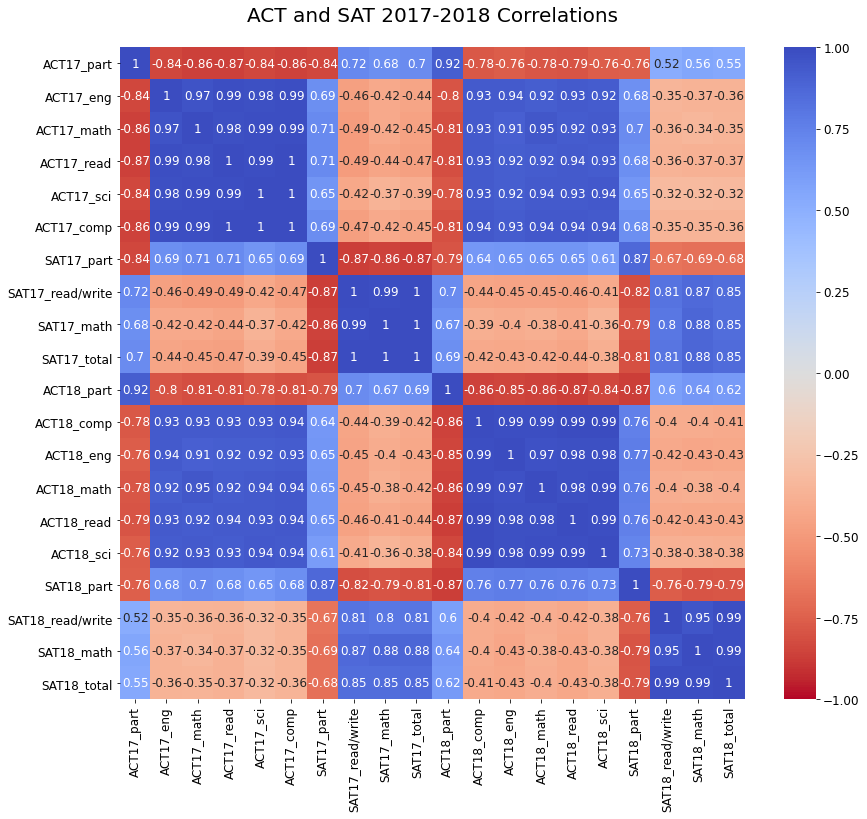

In [156]:
fig, ax = plt.subplots(figsize=(14, 12))

ax.set_title('ACT and SAT 2017-2018 Correlations', fontsize = 20, y = 1.03)

correlations = combined1718.corr()

sns.heatmap(correlations, annot = True, cmap = 'coolwarm_r', vmin = -1, vmax = 1)

plt.show()

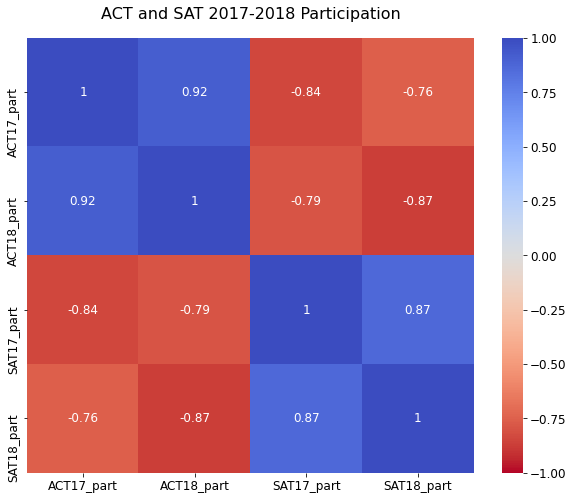

In [157]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.set_title('ACT and SAT 2017-2018 Participation', fontsize = 16, y = 1.03)

correlations = combined1718[["ACT17_part", "ACT18_part", "SAT17_part", "SAT18_part"]].corr()

sns.heatmap(correlations, cmap = 'coolwarm_r', vmin = -1, vmax = 1, annot = True)

plt.show()

There are a few correlations we can pick out from our main heatmap, but this one on partipation clear shows that SAT and ACT Participations are negatively correlated.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [158]:
def subplot_histograms(dataframe, list_of_columns, fig_title):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (14, 7*nrows)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    fig.suptitle(fig_title, fontsize = 18, y = 0.95)
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins = 10) # feel free to add more settings
        
        ax[i].axvline(dataframe[column].median(), color='g', linestyle='dashed', linewidth=2)
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(str(column))
        
        if 'part' in column:
            
            ax[i].set_xlabel('Percentage')
            
        else:
            
            ax[i].set_xlabel('Score')
            
        ax[i].set_ylabel('No. of States')
        
    plt.show()

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

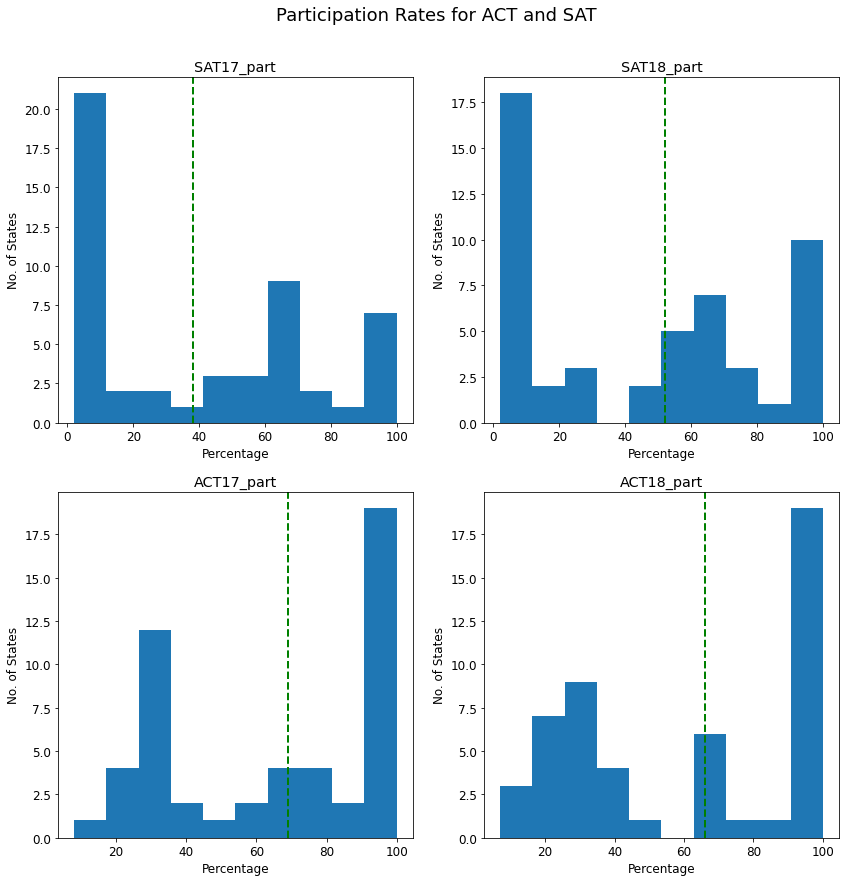

In [159]:
subplot_histograms(combined1718, ["SAT17_part", "SAT18_part", "ACT17_part", "ACT18_part"], 
                   'Participation Rates for ACT and SAT')

Participation seems to be very extreme to the left and right. We can see that the most of the bars are pretty far from the median line.

However, ACT does seem to have a higher proportion of states with very high participation (70-100%).  
This is in contrast with the SAT's, which have a high proportion of states with 0-20% participation.

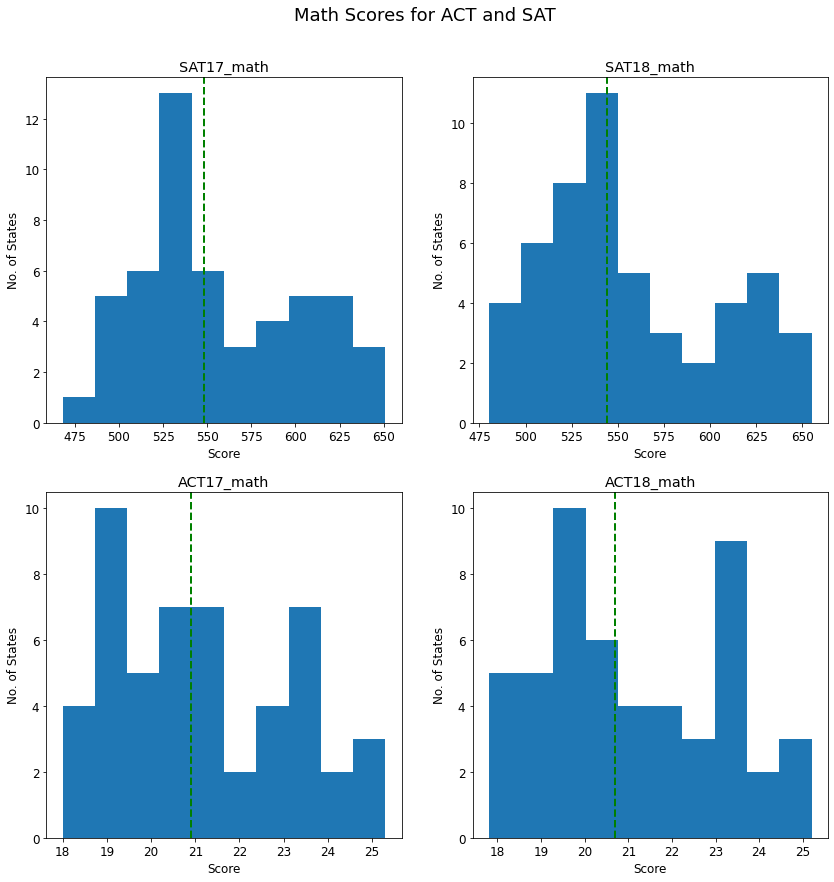

In [160]:
subplot_histograms(combined1718, ["SAT17_math", "SAT18_math", "ACT17_math", "ACT18_math"],
                  "Math Scores for ACT and SAT")

Math scores seem to be somewhat normally distributed, with less states having very low/high scores, and more in the middle. All the scores are generally right skewed, but the ACT scores do seem to show a 'secondary peak' of high scores.

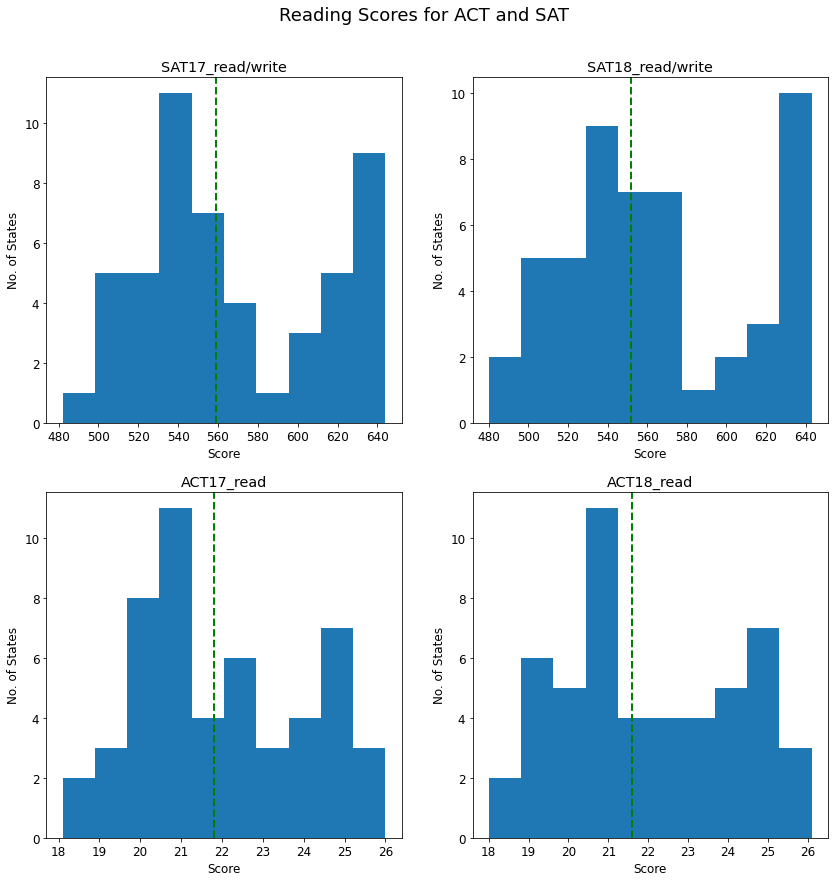

In [161]:
subplot_histograms(combined1718, ["SAT17_read/write", "SAT18_read/write", "ACT17_read", "ACT18_read"], 
                  "Reading Scores for ACT and SAT")

The SAT scores for reading follow a bi-modal distribution. There are two almost equivalent peaks on the left and right side of the median line. The scores for 2018 does seem to show a shift to the right, suggesting that the students scored better in 2018 compared to 2017.

The ACT scores do seem a bit more normally distributed, but with a pretty significant right skew.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [162]:
def subplot_scatter(dataframe, x_data, y_data, fig_title):
    
    ax = dataframe.plot(x = x_data, y = y_data, kind='scatter', figsize=(10,8), s=70)
    
    ax.set_title(fig_title, fontsize = 20, y = 1.05)
    
    x_line = np.array(dataframe[x_data])
    y_line = np.array(dataframe[y_data])
    m, b = np.polyfit(x_line, y_line, 1)

    plt.plot(x_line, m*x_line + b)
        
    plt.show()

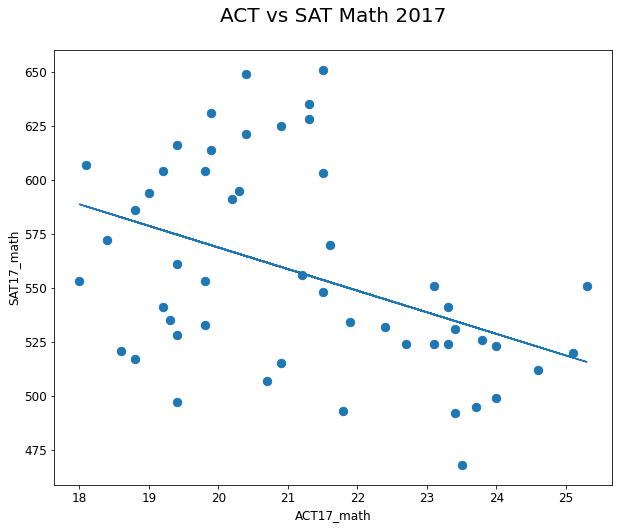

In [163]:
subplot_scatter(combined1718, 'ACT17_math', 'SAT17_math', 'ACT vs SAT Math 2017')

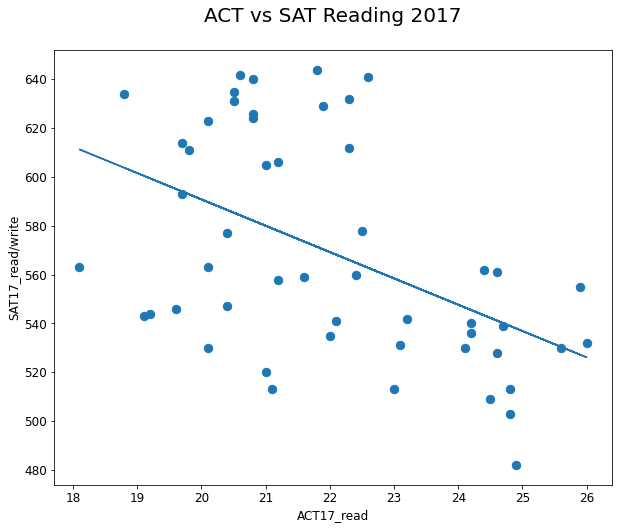

In [164]:
subplot_scatter(combined1718, 'ACT17_read', 'SAT17_read/write', 'ACT vs SAT Reading 2017')

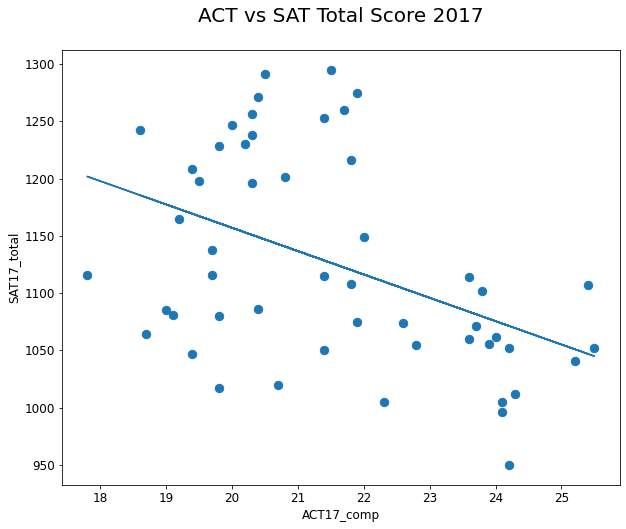

In [165]:
subplot_scatter(combined1718, 'ACT17_comp', 'SAT17_total', 'ACT vs SAT Total Score 2017')

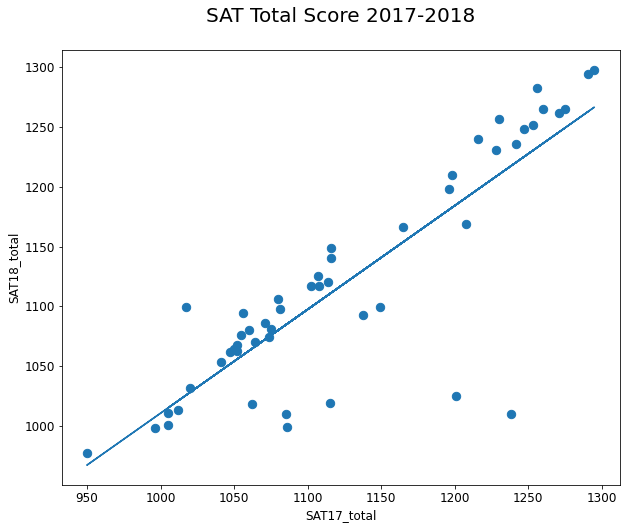

In [166]:
subplot_scatter(combined1718, 'SAT17_total', 'SAT18_total', 'SAT Total Score 2017-2018')

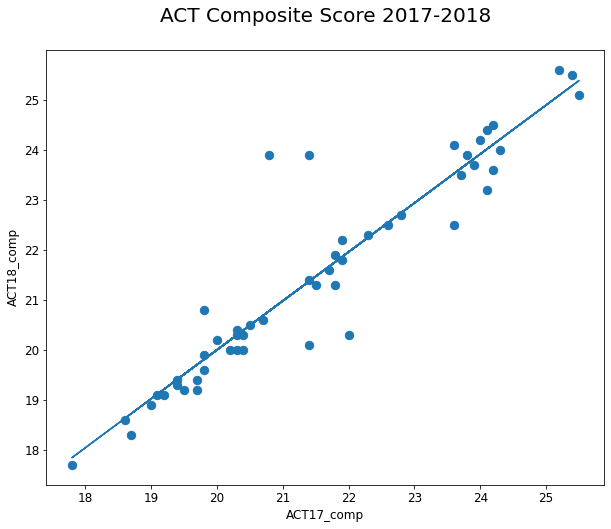

In [167]:
subplot_scatter(combined1718, 'ACT17_comp', 'ACT18_comp', 'ACT Composite Score 2017-2018')

#### Interpretation of Scatter Plots

When we cross-referenced the Math, Reading and Total/Composite Scores of the SAT and the ACT's, there was a negagive correlation. This suggests that each state favors only one of the tests, and that most students only did one of the test and not both.

Our next few scatter plots comparing test results in the 2017-2018 SAT's and the 2017-2018 ACT's further confirms this: every state performed nearly identically to how they performed in the previous years.

### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [168]:
combined1718.head()

,state,ACT17_part,ACT17_eng,ACT17_math,ACT17_read,ACT17_sci,ACT17_comp,SAT17_part,SAT17_read/write,SAT17_math,...,ACT18_part,ACT18_comp,ACT18_eng,ACT18_math,ACT18_read,ACT18_sci,SAT18_part,SAT18_read/write,SAT18_math,SAT18_total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,...,100,19.1,18.9,18.3,19.6,19.0,6.0,595,571,1166
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,...,33,20.8,19.8,20.6,21.6,20.7,43.0,562,544,1106
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,...,66,19.2,18.2,19.4,19.5,19.2,29.0,577,572,1149
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,...,100,19.4,19.1,18.9,19.7,19.4,5.0,592,576,1169
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,...,27,22.7,22.5,22.5,23.0,22.1,60.0,540,536,1076


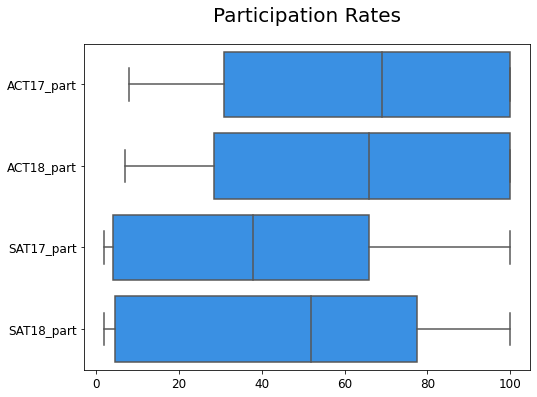

In [169]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.boxplot(data = combined1718[["ACT17_part", "ACT18_part", "SAT17_part", "SAT18_part"]], 
                 orient = 'h', color = 'dodgerblue')

ax.set_title("Participation Rates", fontdict = {'fontsize' : 20}, y = 1.05)

plt.show()

This boxplot clearly shows that participation for ACT seems to be better than for SAT.

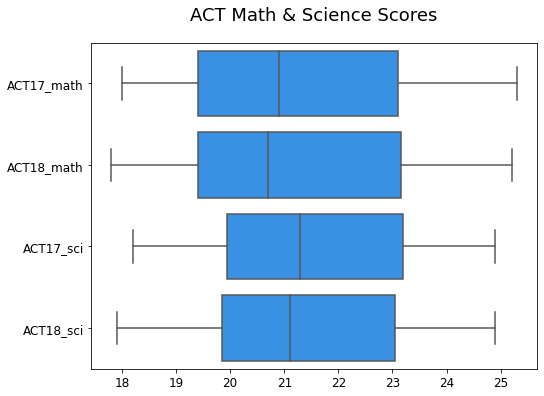

In [170]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.boxplot(data = combined1718[["ACT17_math", "ACT18_math", "ACT17_sci", "ACT18_sci"]], 
                 orient = 'h', color = 'dodgerblue')

ax.set_title("ACT Math & Science Scores", fontdict = {'fontsize' : 18}, y = 1.05)

plt.show()

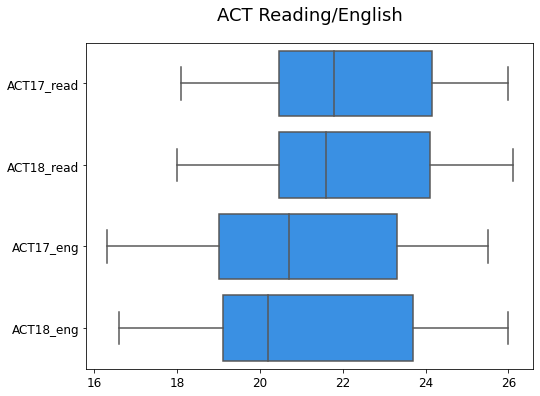

In [171]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.boxplot(data = combined1718[["ACT17_read", "ACT18_read", "ACT17_eng", "ACT18_eng"]], 
                 orient = 'h', color = 'dodgerblue')

ax.set_title("ACT Reading/English", fontdict = {'fontsize' : 18}, y = 1.05)

plt.show()

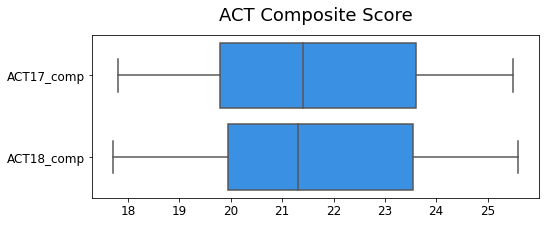

In [172]:
fig, ax = plt.subplots(figsize=(8, 3))

ax = sns.boxplot(data = combined1718[["ACT17_comp", "ACT18_comp"]], 
                 orient = 'h', color = 'dodgerblue')

ax.set_title("ACT Composite Score", fontdict = {'fontsize' : 18}, y = 1.05)

plt.show()

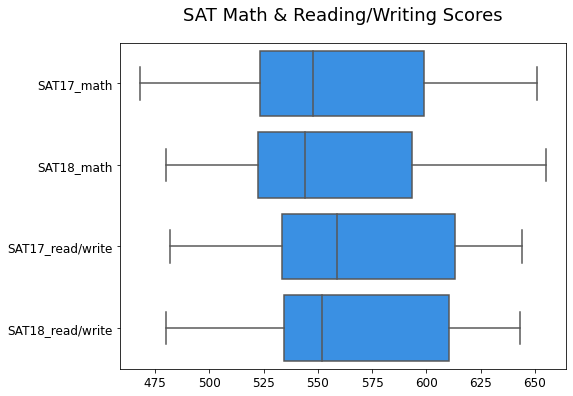

In [173]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.boxplot(data = combined1718[["SAT17_math", "SAT18_math", "SAT17_read/write", "SAT18_read/write"]], 
                 orient = 'h', color = 'dodgerblue')

ax.set_title("SAT Math & Reading/Writing Scores", fontdict = {'fontsize' : 18}, y = 1.05)

plt.show()

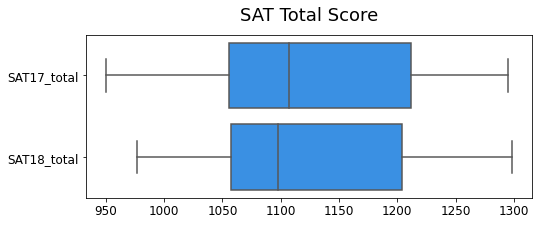

In [174]:
fig, ax = plt.subplots(figsize=(8, 3))

ax = sns.boxplot(data = combined1718[["SAT17_total", "SAT18_total"]], 
                 orient = 'h', color = 'dodgerblue')

ax.set_title("SAT Total Score", fontdict = {'fontsize' : 18}, y = 1.05)

plt.show()

#### Boxplot Interpretations:

The distribution of test scores seem pretty consistent from 2017 to 2018. The spread of data is not too high, and there are no outliers seen on all test scores.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [175]:
combined1718.describe().transpose()[:6]

,count,mean,std,min,25%,50%,75%,max
ACT17_part,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
ACT17_eng,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
ACT17_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
ACT17_read,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
ACT17_sci,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
ACT17_comp,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


In [176]:
combined1718.describe().transpose()[10:16]

,count,mean,std,min,25%,50%,75%,max
ACT18_part,51.0,61.647059,34.080976,7.0,28.50,66.0,100.00,100.0
ACT18_comp,51.0,21.486275,2.106278,17.7,19.95,21.3,23.55,25.6
ACT18_eng,51.0,20.988235,2.446356,16.6,19.10,20.2,23.70,26.0
ACT18_math,51.0,21.125490,2.035765,17.8,19.40,20.7,23.15,25.2
ACT18_read,51.0,22.015686,2.167245,18.0,20.45,21.6,24.10,26.1
ACT18_sci,51.0,21.345098,1.870114,17.9,19.85,21.1,23.05,24.9


The ACT scores are very similar from 2017 to 2018. For both years, the Composite score had a median of ~23.5, with an Inter-Quartile range of ~3.7, and a range of ~7.8. However, we can see that the scores are concentrated closer to the top, with a consistent Upper-Quartile Participation rate of 100%.

The participation rates do seem to have a wider spread. The Median Participation rates are ~67.5%, with an Inter-Quartile range of ~70%, and a range of 92.5%.

In [177]:
combined1718.describe().transpose()[6:10]

,count,mean,std,min,25%,50%,75%,max
SAT17_part,51.0,39.803922,35.276632,2.0,4.0,38.0,66.0,100.0
SAT17_read/write,51.0,569.117647,45.666901,482.0,533.5,559.0,613.0,644.0
SAT17_math,51.0,556.882353,47.121395,468.0,523.5,548.0,599.0,651.0
SAT17_total,51.0,1126.098039,92.494812,950.0,1055.5,1107.0,1212.0,1295.0


In [178]:
combined1718.describe().transpose()[16:]

,count,mean,std,min,25%,50%,75%,max
SAT18_part,51.0,45.745098,37.314256,2.0,4.5,52.0,77.5,100.0
SAT18_read/write,51.0,563.686275,47.502627,480.0,534.5,552.0,610.5,643.0
SAT18_math,51.0,556.235294,47.772623,480.0,522.5,544.0,593.5,655.0
SAT18_total,51.0,1120.019608,94.155083,977.0,1057.5,1098.0,1204.0,1298.0


The Participation rates for both years are quite low but there does seem to be an improvement from 2017 to 2018.  
The spread is quite large: for 2017 the interquartile range is  62%, and it increases to 73% in 2018. The Participation rates skew to the lower end, with a lower quartile of 4%.

The Subject scores have a much lower spread, with consistent Median score of ~1100 for both years, and a consistent InterQuartile range of ~150 marks.


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

---

Answer: No.

We can see from the data that the Average ACT Math scores from the different states are not normally distributed. This shows that the **Central Limit Theorem is not satisfied here**. And the reason is because samples from a population must be random.

Taking each state as a sample of the overall population is flawed, as each state can have very different characteristics compared to others (take Texas vs New York, for example). To have a truly random sample, we must create samples by selecting random individual student results **across states**.



---

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

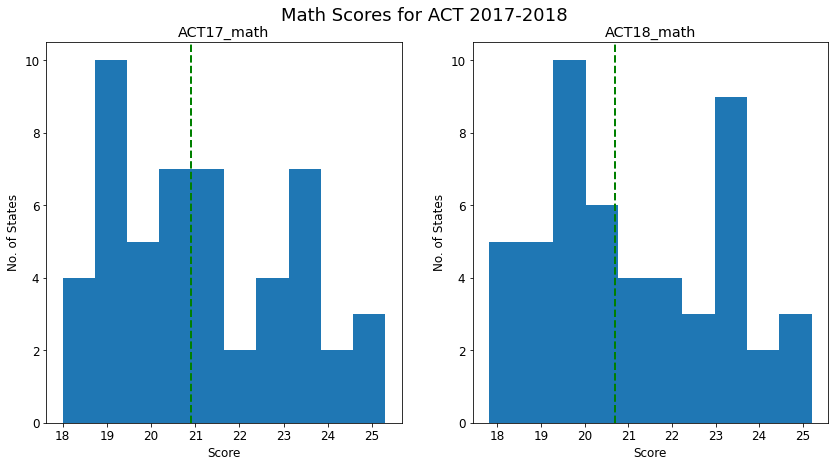

In [179]:
subplot_histograms(combined1718, ["ACT17_math", "ACT18_math"], "Math Scores for ACT 2017-2018")

Answer: No.

For math, we can see that again, central limit theorem does not apply. This shows that the Math aptitude of students across states vary quite significantly.

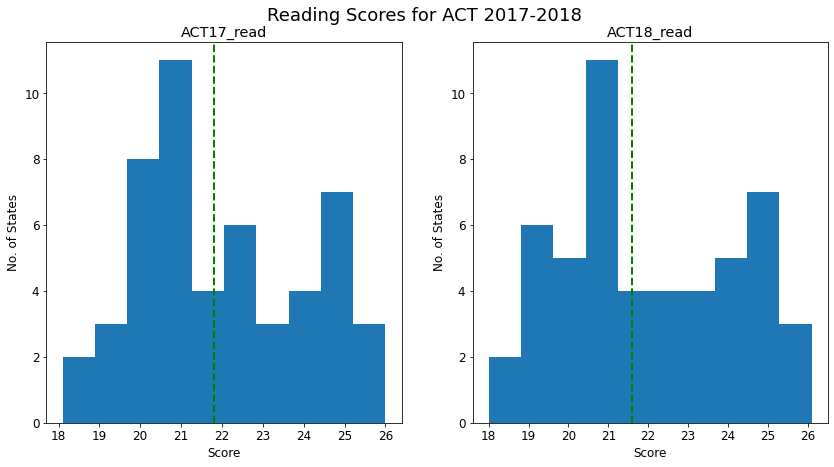

In [180]:
subplot_histograms(combined1718, ["ACT17_read", "ACT18_read"], "Reading Scores for ACT 2017-2018")

As we can see the reading scores are not normally distributed - but it does seem to be *closer* to a Normal distribution than the math scores.

This suggests that students' aptitude in reading varies less from state to state. Hence, every sample (ie, every state) is more representative of the larger population.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actual populations these data describe in answering this question)*

As mentioned before, the data from each state is not a reliable sample of the entire US Population as different states have different policies, and even different cultures and backgrounds which will affect their SAT/ACT Participation and Performance. A scatter plot comparing the ACT vs SAT Participation rates gives us some insight:

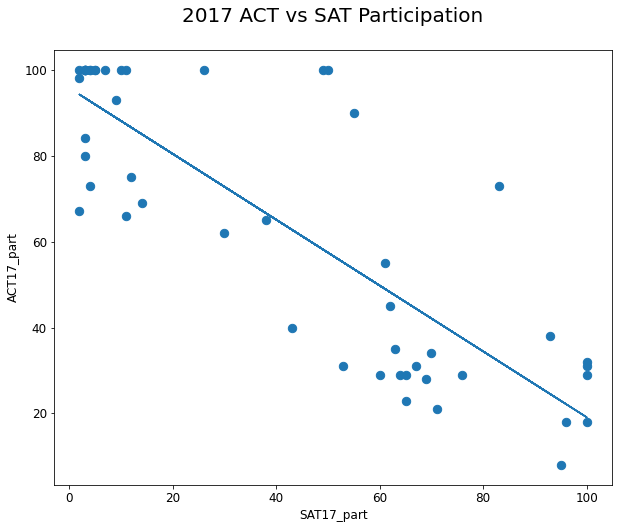

In [181]:
subplot_scatter(combined1718, 'SAT17_part', 'ACT17_part', '2017 ACT vs SAT Participation')

We can see a very strong negative correlation between the participation rate in both tests. This makes sense as it is unlikely for a student to sit for both tests to qualify for a university; most students will just pick one. The strong negative correlation however **suggests that there are strong state factors that affect a student's decision within that state to choose ACT over SAT**, or vice versa. This could be due to educational policies in the different states.

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

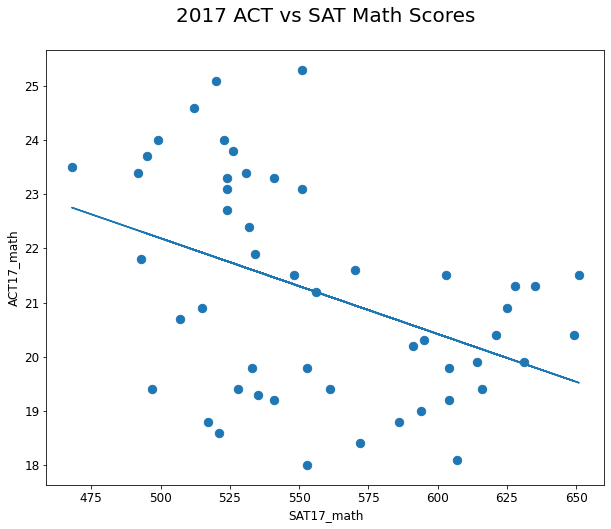

In [182]:
subplot_scatter(combined1718, 'SAT17_math', 'ACT17_math', '2017 ACT vs SAT Math Scores')

In [183]:
combined1718[['ACT17_math', 'SAT17_math']].corr()

,ACT17_math,SAT17_math
ACT17_math,1.000000,-0.420456
SAT17_math,-0.420456,1.000000


The scatterplot does seem to suggest a negative correlation in the two tests: states that do well in the ACT Math test seem to do poorly in the SAT Math test, and vice versa.

However we are not able to make any meaningful observation about which test is harder, as our previous graph on participation clearly shows that every state strong favours one test over the other - so it is extremely unlikely that any student did both tests. Hence we are not able to make any observation on which math test - SAT or ACT - is a better judge of mathematical aptitude.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [184]:
sat_18_part = combined1718["SAT18_part"]
sat_17_part = combined1718["SAT17_part"]

In [185]:
sat_18_part.mean()

45.745098039215684

In [186]:
sat_17_part.mean()

39.80392156862745

In [187]:
from scipy import stats

In [188]:
t_stat, p_value = stats.ttest_ind(sat_18_part, sat_17_part, equal_var = False)

In [189]:
p_value

0.41062697785955005

We see that there is a marked increase in the mean  participation in the SAT's from 2017 to 2018, which suggests that there could be nation-wide external factors that could have come into effect here. However, a t-test return a p-value of 0.41, which shows that there is little statistically significant difference in the nation-wide participation rates from 2017 to 2018.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [190]:
combined_participation = combined1718[["state", "ACT17_part", "ACT18_part", "SAT17_part", "SAT18_part"]]

In [191]:
combined_participation["ACT_part_change"] = (combined_participation["ACT18_part"] - 
                                             combined_participation["ACT17_part"])

/Users/ahmadzainichia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [192]:
combined_participation["SAT_part_change"] = (combined_participation["SAT18_part"] - 
                                             combined_participation["SAT17_part"])

/Users/ahmadzainichia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [193]:
combined_participation.head()

,state,ACT17_part,ACT18_part,SAT17_part,SAT18_part,ACT_part_change,SAT_part_change
0,Alabama,100.0,100,5.0,6.0,0.0,1.0
1,Alaska,65.0,33,38.0,43.0,-32.0,5.0
2,Arizona,62.0,66,30.0,29.0,4.0,-1.0
3,Arkansas,100.0,100,3.0,5.0,0.0,2.0
4,California,31.0,27,53.0,60.0,-4.0,7.0


In [194]:
combined_participation.dtypes

state               object
ACT17_part         float64
ACT18_part           int64
SAT17_part         float64
SAT18_part         float64
ACT_part_change    float64
SAT_part_change    float64
dtype: object

In [195]:
combined_participation['SAT_part_change'].mean()

5.9411764705882355

In [196]:
combined_participation['ACT_part_change'].mean()

-3.607843137254902

We can see that the SAT overall participation rate has increased from 2017 to 2018, with a mean increase of 5.9% across all the states.  
ACT overall participation rates however, has decreased, with a mean decrease of 3.6% across all states

In [202]:
combined_participation.sort_values('SAT_part_change', ascending = False).head()

,state,ACT17_part,ACT18_part,SAT17_part,SAT18_part,ACT_part_change,SAT_part_change
13,Illinois,93.0,43,9.0,99.0,-50.0,90.0
5,Colorado,100.0,30,11.0,100.0,-70.0,89.0
39,Rhode Island,21.0,15,71.0,97.0,-6.0,26.0
48,West Virginia,69.0,65,14.0,28.0,-4.0,14.0
30,New Jersey,34.0,31,70.0,82.0,-3.0,12.0


Looking at the states with the highest overall change, we see that there is a marked increase in SAT Participation across the states of Illinois, Colorado and Rhode Island. This is because these schools were part of 10 states where State Government [covered the cost of the SAT](https://www.edweek.org/ew/articles/2018/10/31/sat-scores-rise-as-number-of-test-takers.html) for all their public school students.

The overall increase in participation rates can also be attributed to a ['SAT School Day" initiative](https://www.usnews.com/news/education-news/articles/2019-09-24/more-students-are-taking-the-sat-than-ever-before), which allowed students to take their SAT's during a regular school day, in their own schools, instead of at another school.

In [198]:
combined_participation.sort_values('ACT_part_change', ascending = False).head()

,state,ACT17_part,ACT18_part,SAT17_part,SAT18_part,ACT_part_change,SAT_part_change
35,Ohio,75.0,100,12.0,18.0,25.0,6.0
27,Nebraska,84.0,100,3.0,3.0,16.0,0.0
2,Arizona,62.0,66,30.0,29.0,4.0,-1.0
20,Maryland,28.0,31,69.0,76.0,3.0,7.0
37,Oregon,40.0,42,43.0,48.0,2.0,5.0
15,Iowa,67.0,68,2.0,3.0,1.0,1.0
31,New Mexico,66.0,67,11.0,16.0,1.0,5.0
33,North Carolina,100.0,100,49.0,52.0,0.0,3.0
26,Montana,100.0,100,10.0,10.0,0.0,0.0
28,Nevada,100.0,100,26.0,23.0,0.0,-3.0


In [199]:
combined_participation[(combined_participation['ACT17_part'] == 100) | 
                       (combined_participation['ACT18_part']== 100)]

,state,ACT17_part,ACT18_part,SAT17_part,SAT18_part,ACT_part_change,SAT_part_change
0,Alabama,100.0,100,5.0,6.0,0.0,1.0
3,Arkansas,100.0,100,3.0,5.0,0.0,2.0
5,Colorado,100.0,30,11.0,100.0,-70.0,89.0
17,Kentucky,100.0,100,4.0,4.0,0.0,0.0
18,Louisiana,100.0,100,4.0,4.0,0.0,0.0
23,Minnesota,100.0,99,3.0,4.0,-1.0,1.0
24,Mississippi,100.0,100,2.0,3.0,0.0,1.0
25,Missouri,100.0,100,3.0,4.0,0.0,1.0
26,Montana,100.0,100,10.0,10.0,0.0,0.0
27,Nebraska,84.0,100,3.0,3.0,16.0,0.0


We continue to see the [huge impact that state sponsorship has](https://sde.ok.gov/newsblog/2017-09-07/oklahoma-act-participation-increase-highest-nation) on participation rates. Both [Ohio](https://www.daytondailynews.com/news/historically-low-act-scores-red-flag-for-our-country/djfx9Urp719WyEaMfykyxL/) and [Nebraska](https://www.education.ne.gov/press_release/nebraska-students-continue-to-out-perform-peer-states-on-act/) were able to achieve 100% participation rates after states started to sponsor the tests.

Colorado is a particularly interesting example as they had 100% ACT Participation in 2017, but dropeed to 30% in 2018. Their SAT Participation, however, jumped from 11% to 100% from 2017 tp 2018. The main reason? The State education board [changed from sponsoring the ACT to the SAT instead](https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [203]:
combined_participation[['state', "ACT17_part", "ACT18_part", 
                        "ACT_part_change"]].sort_values('ACT_part_change', ascending = False).head()

,state,ACT17_part,ACT18_part,ACT_part_change
35,Ohio,75.0,100,25.0
27,Nebraska,84.0,100,16.0
2,Arizona,62.0,66,4.0
20,Maryland,28.0,31,3.0
37,Oregon,40.0,42,2.0


In [201]:
combined_participation[["state", "SAT17_part", "SAT18_part", 
                        "SAT_part_change"]].sort_values('SAT_part_change', ascending = False).head()

,state,SAT17_part,SAT18_part,SAT_part_change
13,Illinois,9.0,99.0,90.0
5,Colorado,11.0,100.0,89.0
39,Rhode Island,71.0,97.0,26.0
48,West Virginia,14.0,28.0,14.0
30,New Jersey,70.0,82.0,12.0


Our analysis shows that the simplest, most effective way to improve participation rates is through state funding of exam fees for **all** students. This is especially so for the SAT's, where we see huge improvements in the states of Illinois, Rhode Island and West Virginia.

The second recommendation is to facilitate the test-taking for the students **during school hours** and **within the same school that the student normally goes to**. We see this with the 'school SAT day' which basically allows students to take the SAT's in the same school that they go to, during normal school hours.

These are two simple but highly effective ways of encouraging high school seniors to sit for the ACT's or SAT's. Going forward, we have to look for what other barriers that are preventing students from taking their tests? The two measures mentioned above erases the two largest barriers: financial and logistical. If state educational boards are able to identify what other barriers their students face, that may help them facilitate student participation in such tests.